In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

Text(0.5, 1.0, 'Form')

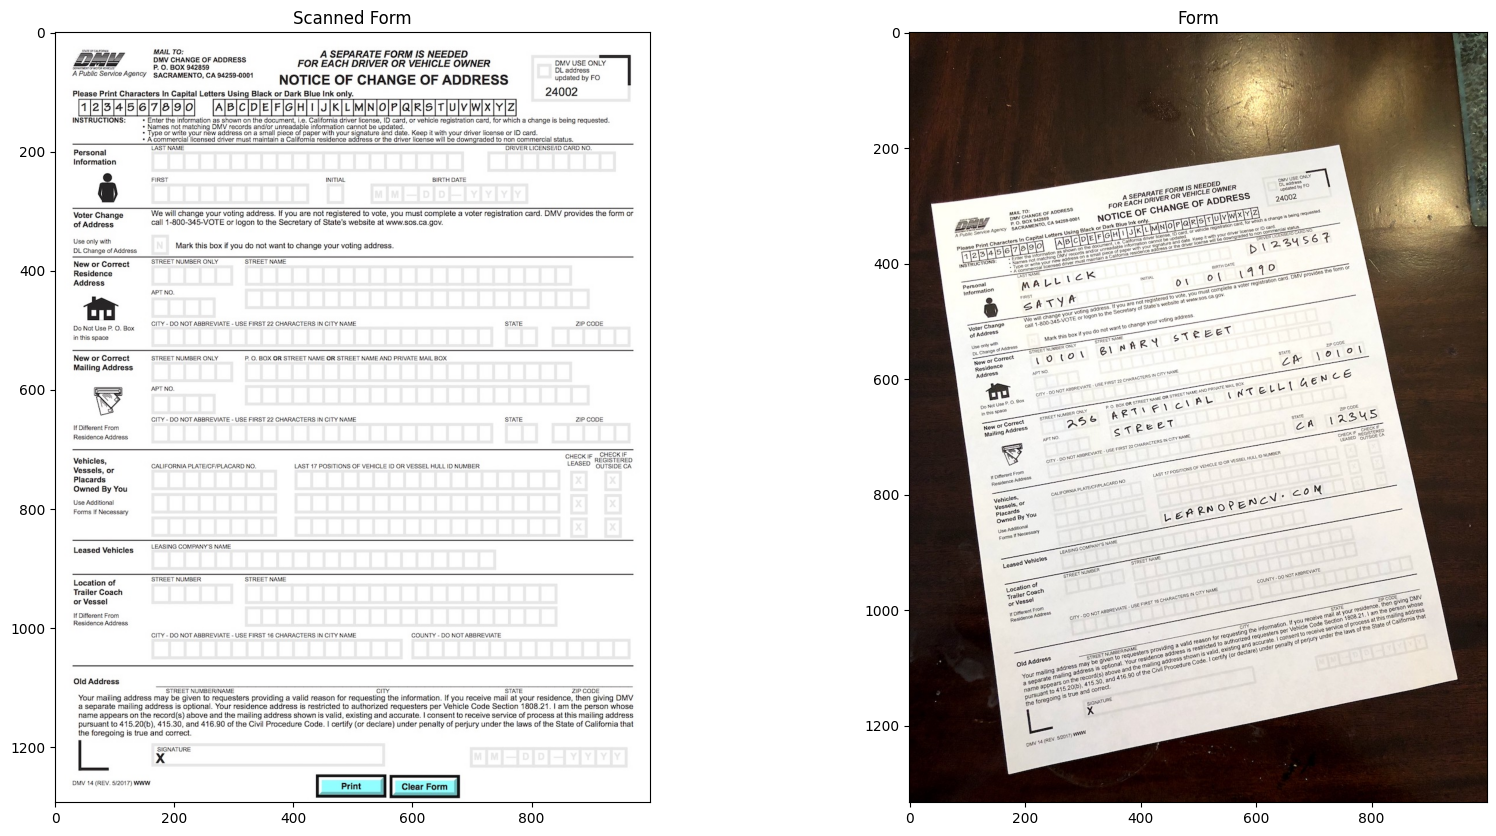

In [ ]:
form = cv2.imread("images/scanned-form.jpg", 1)
form = cv2.cvtColor(form, cv2.COLOR_BGR2RGB)
scanned_form = cv2.imread("images/form.jpg", 1)
scanned_form = cv2.cvtColor(scanned_form, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[20,10])
plt.subplot(1,2,1);plt.imshow(scanned_form, cmap="gray");plt.title("Scanned Form")

plt.subplot(1,2,2);plt.imshow(form, cmap="gray");plt.title("Form")

Text(0.5, 1.0, 'Form')

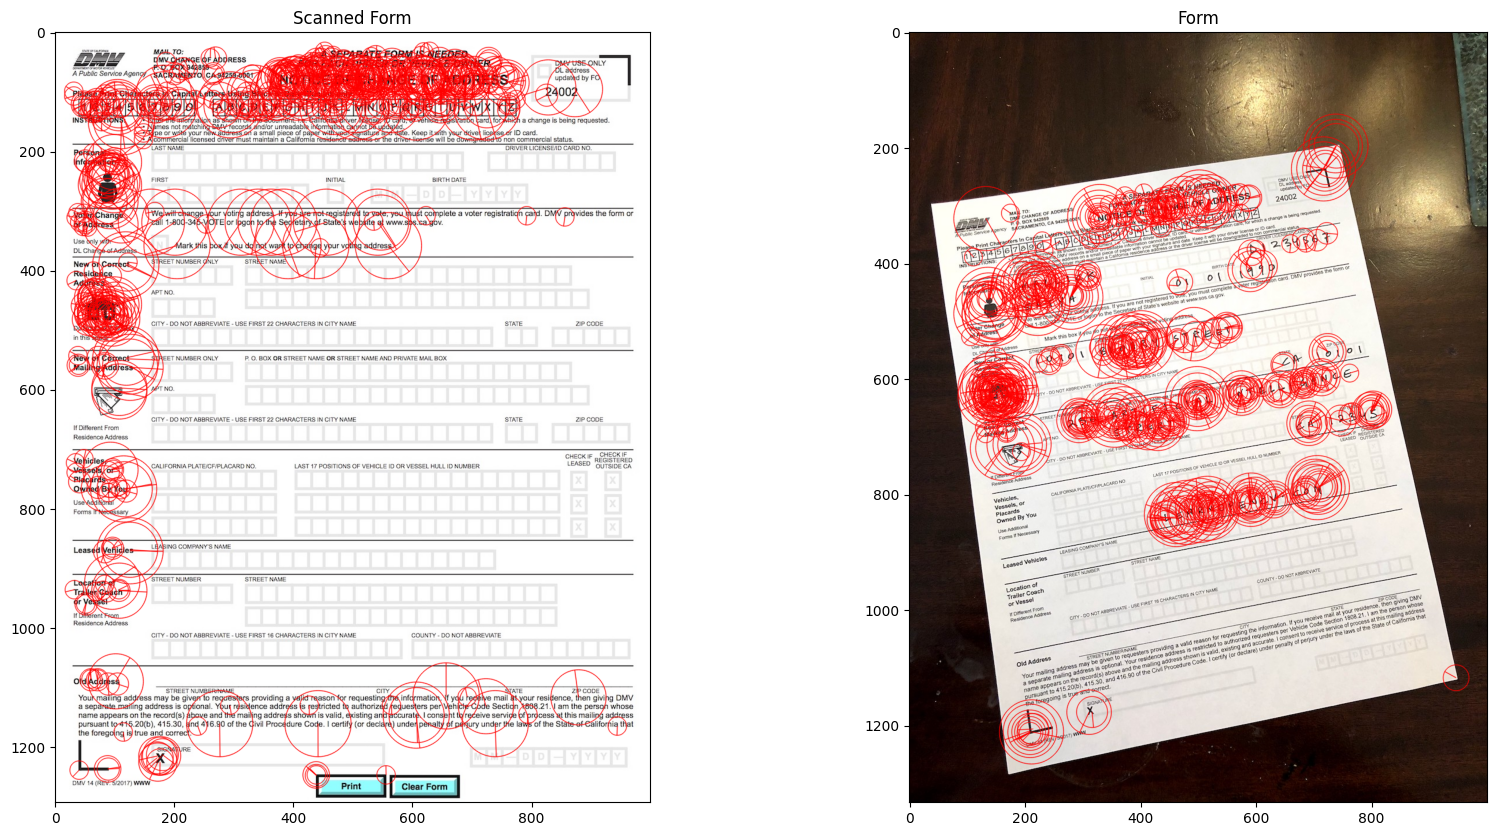

In [7]:
scanned_form_gray = cv2.cvtColor(scanned_form, cv2.COLOR_RGB2GRAY)
form_gray = cv2.cvtColor(form, cv2.COLOR_RGB2GRAY)

MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)

keypoint1, description1 = orb.detectAndCompute(scanned_form_gray, None)
keypoint2, description2 = orb.detectAndCompute(form_gray, None)

img_scanned_form = cv2.drawKeypoints(scanned_form, keypoint1, None,
                                    (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_form = cv2.drawKeypoints(form, keypoint2, None,
                            (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[20,10])
plt.subplot(1,2,1);plt.imshow(img_scanned_form);plt.title("Scanned Form")
plt.subplot(1,2,2);plt.imshow(img_form);plt.title("Form")

Text(0.5, 1.0, 'Original Form')

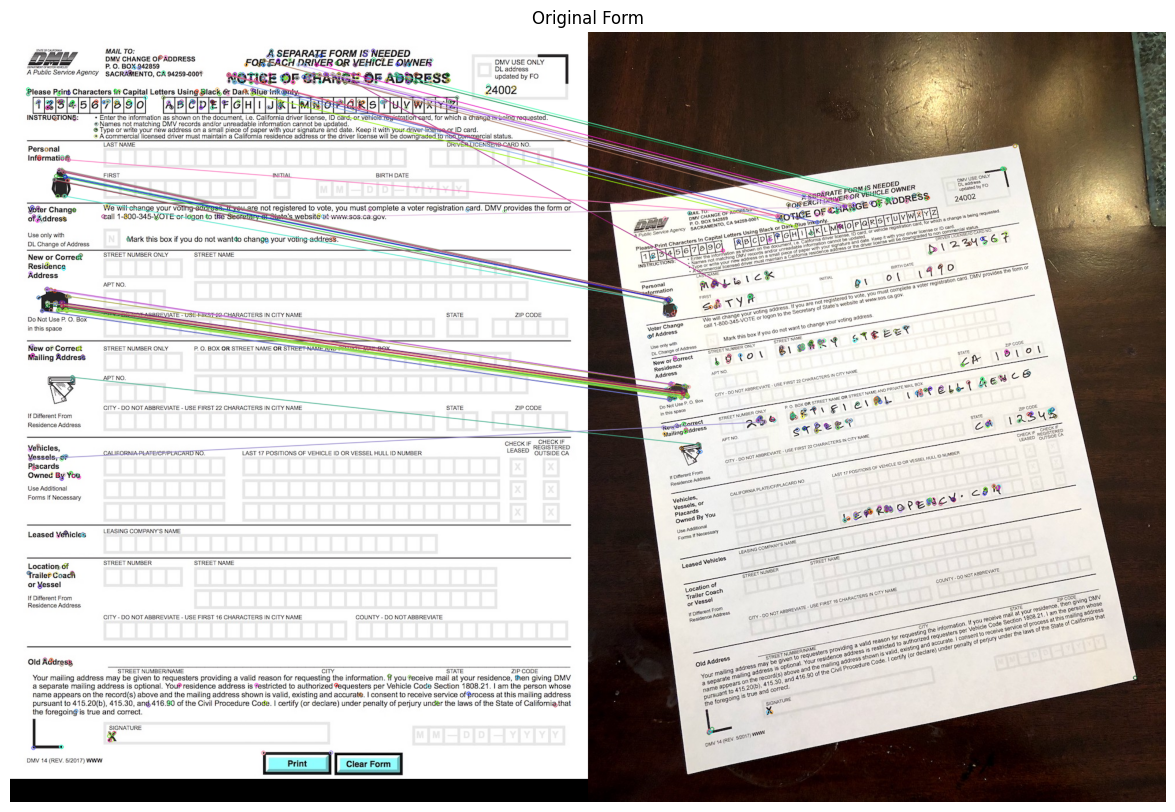

In [8]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

matches = list(matcher.match(description1,description2, None))

matches.sort(key = lambda x: x.distance, reverse=False)

numGoodMatches = int(len(matches)*0.1)
matches = matches[:numGoodMatches]

im_matches = cv2.drawMatches(scanned_form, keypoint1, form, keypoint2, matches, None)

plt.figure(figsize=[40, 10])
plt.imshow(im_matches);plt.axis("off");plt.title("Original Form")

In [9]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoint1[match.queryIdx].pt
    points2[i, :] = keypoint2[match.trainIdx].pt

h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

Text(0.5, 1.0, 'Form')

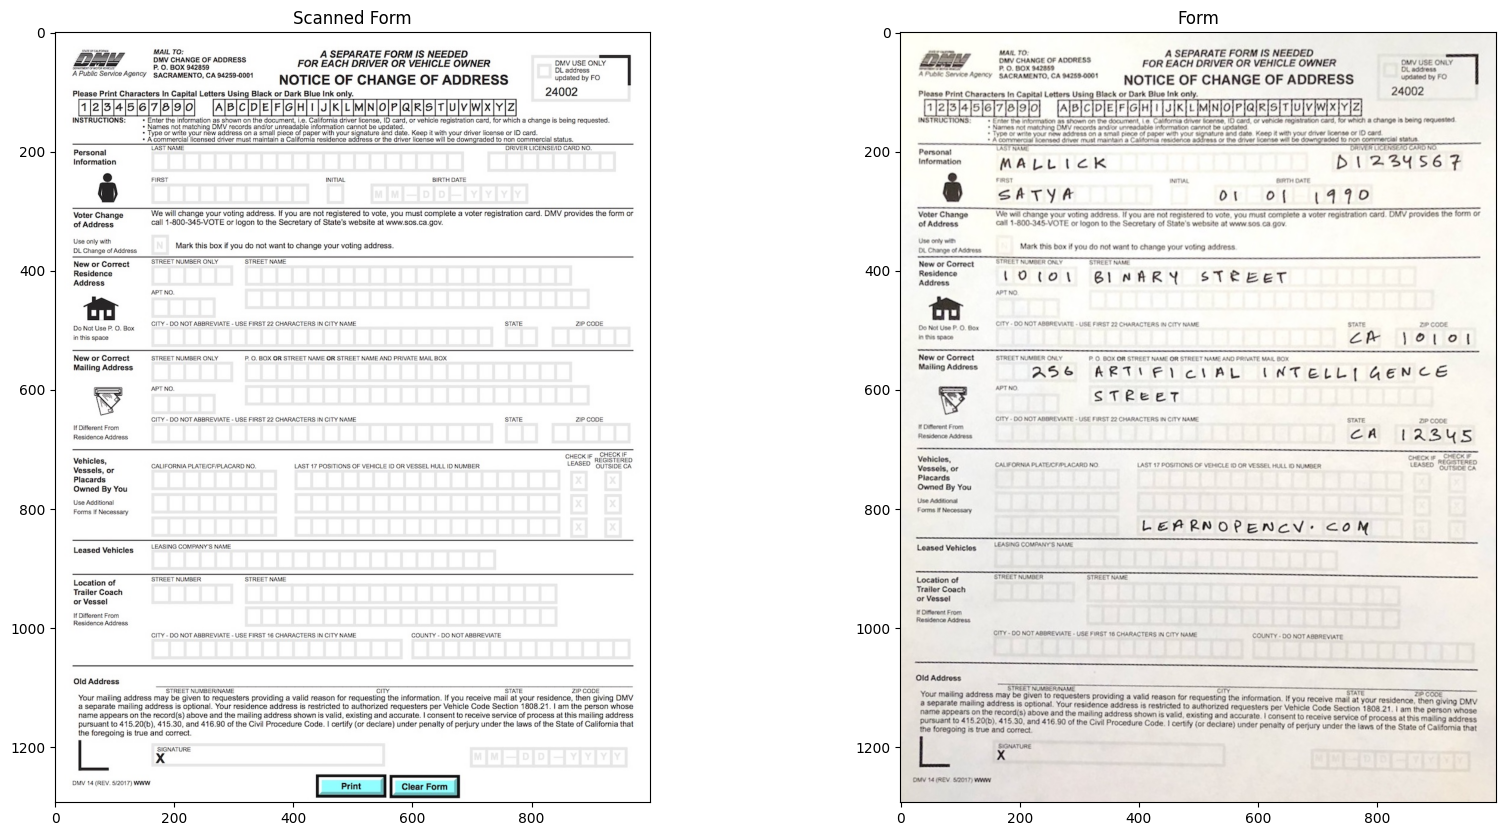

In [10]:
height, width, channels = scanned_form.shape
im2_reg = cv2.warpPerspective(form, h, (width, height))

plt.figure(figsize=[20,10])
plt.subplot(1,2,1);plt.imshow(scanned_form);plt.title("Scanned Form")
plt.subplot(1,2,2);plt.imshow(im2_reg);plt.title("Form")